In [1]:
from model import ModelHandler
from DataLoader import DiagnosisEnd2End
import numpy as np
import tqdm

from ImageTransformations import otsu, mnorm

## End2End Data

In [2]:
path_segmentation = "../data/Diagnosis/"
nodules_path = "../data/Diagnosis/Radiolung_NoduleDiagnosis.csv"


def otsu_norm_transf(x): return otsu(mnorm(x, -680, 340))

In [3]:
diagonis = DiagnosisEnd2End(path_segmentation, nodules_path)

X_data_curated = np.zeros((47,14, 240, 240))
y_data_curated = np.zeros(47)
i = 0

for data in tqdm.tqdm(diagonis):
    m = data['ROI'].shape[0]//2
    X_data_curated[i] = otsu_norm_transf(data['ROI'])[m-7:m+7,:,:]
    y_data_curated[i] = data['GT']
    i+=1


 81%|████████  | 42/52 [02:17<00:32,  3.28s/it]


## SVM

In [4]:
svm = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'SVM', n_splits = 5)
svm.fit(True,True)

[INFO] The best parameters are {'C': 10.0, 'kernel': 'poly'}
[INFO] The best score is 0.7800
[INFO] The best parameters according to ci are {'C': 0.01, 'kernel': 'rbf'}
[INFO] Train acc  is : 0.7234


In [5]:
svm.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,C,kernel,mean,sem,ci,sort
2,"{'C': 0.01, 'kernel': 'rbf'}",0.7,0.7,0.7,0.7,0.7,0.01,rbf,0.70,1.000000e-08,"(0.6999999722355489, 0.700000027764451)",0.350000
3,"{'C': 0.01, 'kernel': 'sigmoid'}",0.7,0.7,0.7,0.7,0.7,0.01,sigmoid,0.70,1.000000e-08,"(0.6999999722355489, 0.700000027764451)",0.350000
1,"{'C': 0.01, 'kernel': 'poly'}",0.7,0.7,0.7,0.7,0.7,0.01,poly,0.70,1.000000e-08,"(0.6999999722355489, 0.700000027764451)",0.350000
10,"{'C': 10000.0, 'kernel': 'rbf'}",0.7,0.8,0.9,0.8,0.7,10000.00,rbf,0.78,3.741658e-02,"(0.6761149088671919, 0.8838850911328081)",0.338057
13,"{'C': 10000000.0, 'kernel': 'poly'}",0.7,0.8,0.9,0.8,0.7,10000000.00,poly,0.78,3.741658e-02,"(0.6761149088671919, 0.8838850911328081)",0.338057


findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.


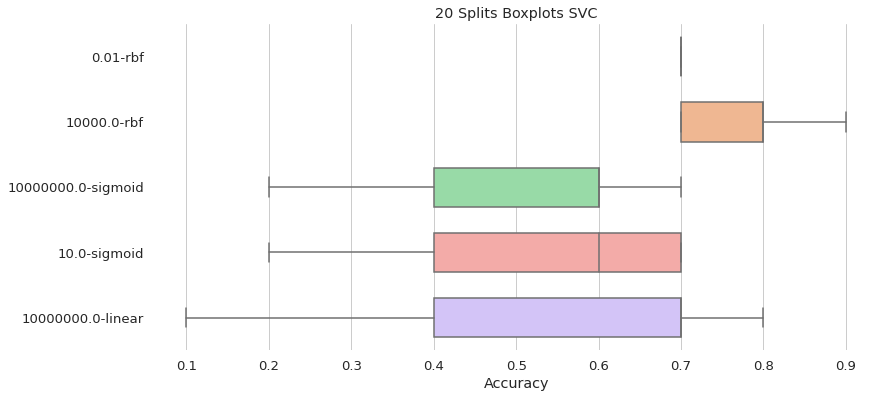

In [6]:
svm.boxplots(20)

## KNN

In [7]:
knn = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'KNN', n_splits = 5)
knn.fit(True,True)

[INFO] The best parameters are {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
[INFO] The best score is 0.6400
[INFO] The best parameters according to ci are {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
[INFO] Train acc  is : 0.6809


In [8]:
knn.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,algorithm,n_neighbors,p,mean,sem,ci,sort
2,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}",0.7,0.7,0.7,0.4,0.6,auto,5,1,0.62,0.05831,"(0.4581067937646782, 0.7818932062353215)",0.229053
3,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2}",0.7,0.7,0.7,0.4,0.6,auto,5,2,0.62,0.05831,"(0.4581067937646782, 0.7818932062353215)",0.229053
4,"{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}",0.7,0.7,0.7,0.4,0.6,auto,7,1,0.62,0.05831,"(0.4581067937646782, 0.7818932062353215)",0.229053
28,"{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1}",0.7,0.7,0.7,0.4,0.6,brute,7,1,0.62,0.05831,"(0.4581067937646782, 0.7818932062353215)",0.229053
27,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2}",0.7,0.7,0.7,0.4,0.6,brute,5,2,0.62,0.05831,"(0.4581067937646782, 0.7818932062353215)",0.229053


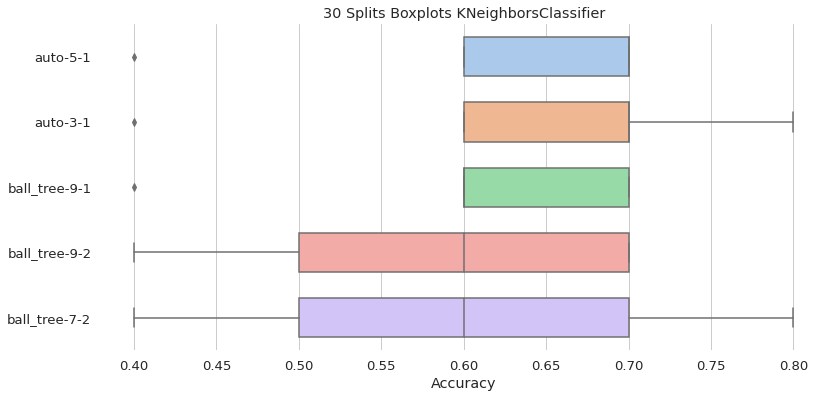

In [9]:
knn.boxplots(30)

## Decision Tree

In [10]:
dt = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'DT', n_splits = 5)
dt.fit(True,True)

[INFO] The best parameters are {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
[INFO] The best score is 0.6800
[INFO] The best parameters according to ci are {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
[INFO] Train acc  is : 1.0000


In [11]:
dt.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,criterion,max_features,splitter,mean,sem,ci,sort
4,"{'criterion': 'gini', 'max_features': 'log2', ...",0.5,0.7,0.8,0.7,0.7,gini,log2,best,0.68,0.048990,"(0.5439824961038976, 0.8160175038961025)",0.271991
5,"{'criterion': 'gini', 'max_features': 'log2', ...",0.5,0.6,0.8,0.5,0.7,gini,log2,random,0.62,0.058310,"(0.4581067937646784, 0.7818932062353219)",0.229053
7,"{'criterion': 'entropy', 'max_features': 'auto...",0.7,0.8,0.9,0.5,0.5,entropy,auto,random,0.68,0.080000,"(0.45788436381972497, 0.9021156361802749)",0.228942
1,"{'criterion': 'gini', 'max_features': 'auto', ...",0.8,0.6,0.6,0.5,0.5,gini,auto,random,0.60,0.054772,"(0.44792781085638506, 0.7520721891436148)",0.223964
8,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.6,0.6,0.9,0.5,0.5,entropy,sqrt,best,0.62,0.073485,"(0.41597375803807185, 0.8240262419619282)",0.207987


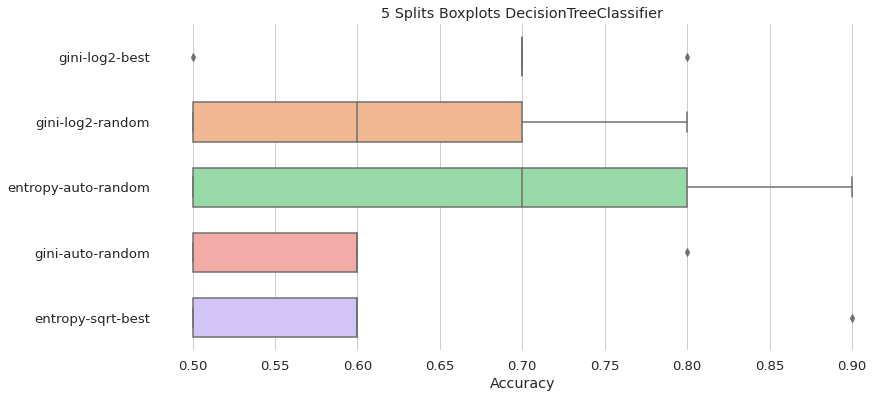

In [12]:
dt.boxplots(5)

In [13]:
from results_analysis import results_analysis

In [14]:
results_analysis(y_data_curated, dt.predict(X_data_curated))


(   accuracy  f1score  precision  recall
 0       1.0      1.0        1.0     1.0,
    tn  fp  fn  tp
 0  13   0   0  34)

In [ ]:
results_analysis(y_data_curated, knn.predict(X_data_curated))

In [ ]:
results_analysis(y_data_curated, svm.predict(X_data_curated))
